<a href="https://colab.research.google.com/github/nbarco25/bootcampMujeresDigitales/blob/main/taller_semana_4_natalia_barco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Investigando los accidentes de tránsito en Nueva York

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import seaborn as sns
import datetime as dt
import numpy as np

## Introducción

**Contexto empresarial.** La ciudad de Nueva York ha experimentado un aumento en el número de accidentes en las vías de la ciudad. Quieren saber si el número de accidentes ha aumentado en las últimas semanas. Para todos los accidentes reportados, han recopilado detalles para cada accidente y han estado manteniendo registros durante el último año y medio (desde enero de 2018 hasta agosto de 2019).

La ciudad te ha contratado para que construyas visualizaciones que les ayuden a identificar patrones en accidentes, lo que les ayudaría a tomar acciones preventivas para reducir la cantidad de accidentes en el futuro. Tienen ciertos parámetros como comuna, hora del día, motivo del accidente, etc. De los que se preocupan y de los que les gustaría obtener información específica.

**Problema empresarial.** Su tarea es formatear los datos proporcionados y proporcionar visualizaciones que respondan a las preguntas específicas que tiene el cliente, que se mencionan a continuación.

**Contexto analítico.** Se le proporciona un archivo CSV que contiene detalles sobre cada accidente como fecha, hora, ubicación del accidente, motivo del accidente, tipos de vehículos involucrados, recuento de lesiones y muertes, etc. El delimitador en el archivo CSV dado es; en lugar del predeterminado,. Realizará las siguientes tareas con los datos:

*    Leer, transformar y preparar datos para su visualización
*    Realizar análisis y construir visualizaciones de los datos para identificar patrones en el conjunto de datos.

El cliente tiene un conjunto específico de preguntas a las que le gustaría obtener respuestas. Deberá proporcionar visualizaciones para acompañar estos:

1.    ¿Cómo ha fluctuado el número de accidentes durante el último año y medio? ¿Han aumentado con el tiempo?
2.   Para un día en particular, ¿durante qué horas es más probable que ocurran accidentes?
3.    ¿Hay más accidentes entre semana que los fines de semana?
4.    ¿Cuál es la proporción de accidentes por área por comuna? ¿Qué distritos tienen un número desproporcionadamente grande de accidentes para su tamaño?
5.    Para cada comuna, ¿durante qué horas es más probable que ocurran accidentes?
6.    ¿Cuáles son las 5 principales causas de accidentes en la ciudad?

In [20]:
# Use la siguiente informacipón de cada comuna ("borough") para realizar los análisis

borough_data = {'the bronx': {'name': 'the bronx', 'population': 1471160.0, 'area': 42.1},
 'brooklyn': {'name': 'brooklyn', 'population': 2648771.0, 'area': 70.82},
 'manhattan': {'name': 'manhattan', 'population': 1664727.0, 'area': 22.83},
 'queens': {'name': 'queens', 'population': 2358582.0, 'area': 108.53},
 'staten island': {'name': 'staten island', 'population': 479458.0, 'area': 58.37}}

Tenemos las siguientes columnas

     Borough: el comuna en el que ocurrió el accidente.
     COLLISION_ID: un identificador único para esta colisión
     CONTRIBUTING FACTOR VEHICLE (1, 2, 3, 4, 5): Motivos del accidente
     CROSS STREET : Calle transversal más cercana al lugar de los accidentes
     DATE: Fecha del accidente (Object)
     TIME: Hora del accidente
     DATETIME: la columna que creamos anteriormente con la combinación de fecha y hora
     LATITUDE: Latitud del accidente
     LONGITUDE: Longitud del accidente
     NUMBER OF (CYCLIST, MOTORIST, PEDESTRIANS) INJURED: Lesión por categoría
     NUMBER OF (CYCLIST, MOTORIST, PEDESTRIANS) KILLED: Categoría muerte sabia
     ON STREET NAME: Calle donde ocurrió el accidente
     TOTAL INJURED: Total de heridos por el accidente
     TOTAL KILLED: Total de bajas en el accidente
     VEHICLE TYPE CODE (1, 2, 3, 4, 5): Tipos de vehículos involucrados en el accidente
     ZIP CODE: código postal del lugar del accidente

Primero cargue los datos del csv a un dataframe.

**Nota:** El archivo se encuentra separado por punto y coma ( ; ) en lugar de coma ( , ), así que se debe ingresar el parámetro sep para leer el archivo. Aquí puede encontrar información:

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html#pandas.read_csv

In [3]:
# Escriba su código aquí
df = pd.read_csv('accidents_sample.csv', sep= ';')

In [4]:
df.columns

Index(['DATE', 'TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE', 'LONGITUDE',
       'ON STREET NAME', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5'],
      dtype='object')

## Parte 1: Accidentes a lo largo del tiempo

Agrupe los datos disponibles mensualmente y genere una gráfica lineal de accidentes a lo largo del tiempo. ¿Ha aumentado el número de accidentes durante el último año y medio?

In [5]:
# Escriba su código aquí
#para crear una columna "MONTH" que tiene 
df['DATE'] = pd.to_datetime(df['DATE'])
df['MONTH'] = df['DATE'].dt.month
df['YEAR'] = df['DATE'].dt.year

In [6]:
lista_cantidad_meses = df.groupby(['YEAR','MONTH']).MONTH.count()
cantidad = lista_cantidad_meses.to_list()
meses=['Ene','Feb','Mar','Abr','May','Jun','Jul','Ago','Sep','Oct','Nov','Dic']
index_meses=[]

for i in range(1,((len(meses))+9)):
    meses.append(meses[i])
    index_meses.append(i)

df1 = pd.DataFrame(list(zip(index_meses,cantidad)), columns = ['MONTHS','ACCIDENTS'])
df1
#df1['MONTHS'].to_list()
#index_meses

,MONTHS,ACCIDENTS
0,1,585
1,2,556
2,3,613
3,4,616
4,5,686
5,6,674
6,7,632
7,8,674
8,9,621
9,10,666


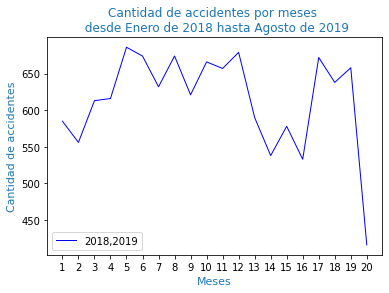

In [7]:
plt.plot(index_meses,df1['ACCIDENTS'],label='2018,2019', linewidth = 1, color='blue')
plt.ylabel("Cantidad de accidentes",fontdict = {'fontsize':11,'color':'tab:blue'})
plt.xlabel("Meses",fontdict = {'fontsize':11, 'color':'tab:blue'})
plt.title('Cantidad de accidentes por meses \n desde Enero de 2018 hasta Agosto de 2019', loc = "center", fontdict = {'fontsize':12, 'color':'tab:blue'})
plt.xticks(list(range(1,21)),[str(i) for i in range(1,21)])
plt.legend()


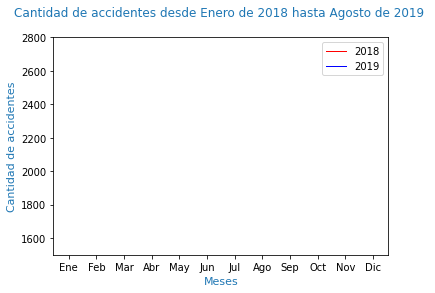

In [33]:
meses=['Ene','Feb','Mar','Abr','May','Jun','Jul','Ago','Sep','Oct','Nov','Dic']
cantidad = lista_cantidad_meses.to_list()
x = meses
x2= meses[:8]
y1 = cantidad[:12]
y2 = cantidad[12:]
plt.plot(x,y1,label='2018', linewidth = 1, color='red')
plt.plot(x2,y2, label='2019',linewidth= 1, color='blue')
plt.ylabel("Cantidad de accidentes",fontdict = {'fontsize':11, 'color':'tab:blue'})
plt.xlabel("Meses",fontdict = {'fontsize':11, 'color':'tab:blue'})
plt.title('Cantidad de accidentes desde Enero de 2018 hasta Agosto de 2019 \n', loc = "center", fontdict = {'fontsize':12, 'color':'tab:blue'})
plt.ylim([1500,2800])
plt.legend()
plt.show()



## Parte 2: Puntos calientes de accidentes en un día

¿Cómo varía el número de accidentes a lo largo de un solo día? Cree una nueva columna HORA basada en los datos de la columna DATETIME, luego trace un gráfico de barras de la distribución por hora a lo largo del día.

In [11]:
# Escriba su código aquí
#df['DATE'] = pd.to_datetime(df['DATE'])
df['DAY'] = df['DATE'].dt.day
#cantidad_dias = df.groupby(['DAY','TIME']).DAY.count()
#print(cantidad_dias)

df['HORA'] = pd.to_datetime(df['TIME'])
minutos = df.groupby(df['HORA'].dt.hour).HORA.count()
minutos



dia=df.loc[df['DATE'] == "2019-05-29"]
df4 = dia.groupby(df['HORA'].dt.hour).HORA.count()
horas = df4.index.to_list()
df4.values
df4

HORA
0     1
6     1
8     3
9     2
10    1
11    1
12    2
13    2
14    3
15    1
16    2
17    3
18    2
19    2
20    1
Name: HORA, dtype: int64

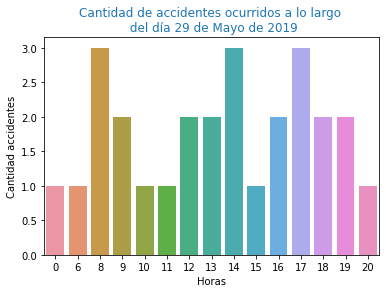

In [12]:
ax = sns.barplot(x = df4.index, y = df4.values, ci=False)
ax.set(xlabel='Horas', ylabel='Cantidad accidentes')
plt.title('Cantidad de accidentes ocurridos a lo largo \n del día 29 de Mayo de 2019', loc = "center", fontdict = {'fontsize':12,  'color':'tab:blue'})

plt.show()
#sns.barplot(x = 'Hora del día', y = '# de accidentes', data = df4, ci=False)

In [13]:
df5 = df.groupby(df['HORA'].dt.hour).HORA.count()
df5

HORA
0     447
1     186
2     137
3     120
4     123
5     138
6     247
7     333
8     692
9     665
10    657
11    608
12    677
13    716
14    817
15    819
16    927
17    937
18    803
19    630
20    494
21    430
22    381
23    298
Name: HORA, dtype: int64

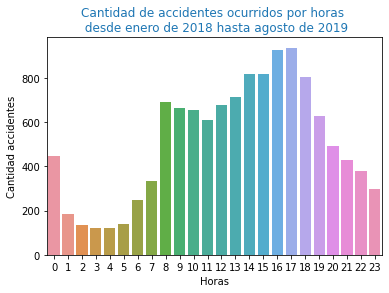

In [14]:
ax=sns.barplot(x = df5.index, y = df5.values, ci=False)
ax.set(xlabel='Horas', ylabel='Cantidad accidentes')
plt.title('Cantidad de accidentes ocurridos por horas \n desde enero de 2018 hasta agosto de 2019', loc = "center", fontdict = {'fontsize':12,  'color':'tab:blue'})

plt.show()

## Parte 3: Accidentes por día laborable

¿Cómo varía el número de accidentes en una sola semana? Trace un gráfico de barras basado en el recuento de accidentes por día de la semana.

In [15]:
# Escriba su código aquí
df6=df
df6.sort_values('DATE', ascending=False)
semana=df6.loc[df['DATE'].between("2019-08-07","2019-08-11") ]
semana.groupby(semana['DATE']).DATE.count()
cantidad_acc = semana.groupby(semana['DATE']).DATE.count().values
fechas = semana.groupby(semana['DATE']).DATE.count().index
fechas.day
cantidad_acc
print(semana.groupby(semana['DATE']).DATE.count())

DATE
2019-08-07    17
2019-08-08    23
2019-08-09    18
2019-08-10    12
2019-08-11    20
Name: DATE, dtype: int64


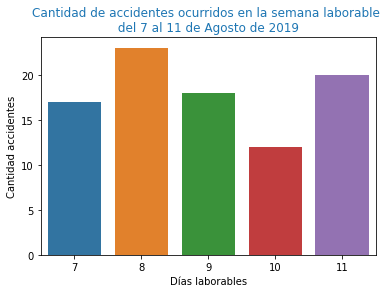

In [16]:
ax = sns.barplot(x = fechas.day, y = cantidad_acc , data = semana,ci=False)
ax.set(xlabel='Días laborables', ylabel='Cantidad accidentes')
plt.title('Cantidad de accidentes ocurridos en la semana laborable \n del 7 al 11 de Agosto de 2019 ', loc = "center", fontdict = {'fontsize':12,  'color':'tab:blue'})
plt.show()

## Parte 4: Análisis de comuna

Trace un gráfico de barras del número total de accidentes en cada comuna, así como uno de los accidentes por kilómetro cuadrado por comuna. ¿Qué puedes concluir?

In [17]:
# Escriba su código aquí
por_comunas = df.groupby(df['BOROUGH']).BOROUGH.count()
nombres_comunas = por_comunas.index
cantidad_acc_comunas = por_comunas.values
por_comunas

BOROUGH
BRONX            1944
BROOKLYN         3902
MANHATTAN        2589
QUEENS           3375
STATEN ISLAND     472
Name: BOROUGH, dtype: int64

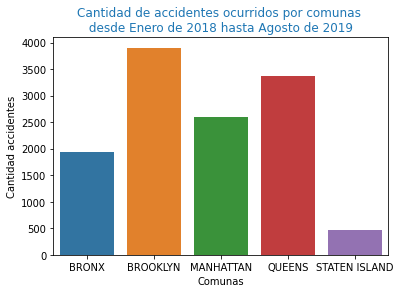

In [18]:
ax=sns.barplot(x = nombres_comunas, y = cantidad_acc_comunas , data = semana,ci=False)
plt.title('Cantidad de accidentes ocurridos por comunas \n desde Enero de 2018 hasta Agosto de 2019 ', loc = "center", fontdict = {'fontsize':12,  'color':'tab:blue'})
ax.set(xlabel='Comunas', ylabel='Cantidad accidentes')
plt.show()

In [21]:
##deaccidentespor comuna / area de cada comuna = numero de accidentes por km2 p
df_borough = pd.DataFrame(borough_data).transpose()
df_borough['accidents'] = df.groupby(df['BOROUGH']).BOROUGH.count().values
df_borough['acc_km2'] = df_borough['accidents'] / df_borough['area'] 
df_borough

,name,population,area,accidents,acc_km2
the bronx,the bronx,1.47116e+06,42.1,1944,46.1758
brooklyn,brooklyn,2.64877e+06,70.82,3902,55.0974
manhattan,manhattan,1.66473e+06,22.83,2589,113.403
queens,queens,2.35858e+06,108.53,3375,31.0974
staten island,staten island,479458,58.37,472,8.08635


Text(0.5, 1.0, 'Cantidad de accidentes por kilómetro cuadrádo \n en las diferentes comunas')

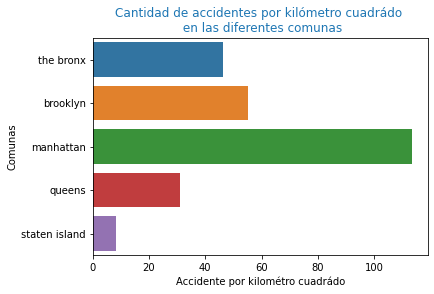

In [22]:
ax=sns.barplot(x = 'acc_km2', y = 'name', data = df_borough,ci=False)
ax.set(xlabel='Accidente por kilométro cuadrádo', ylabel='Comunas')
plt.title('Cantidad de accidentes por kilómetro cuadrádo \n en las diferentes comunas', loc = "center", fontdict = {'fontsize':12,  'color':'tab:blue'})

## Parte 5: Análisis por hora del comuna

¿Qué horas tienen más accidentes en cada comuna? Trace un gráfico de barras para cada comuna que muestre el número de accidentes por cada hora del día.

In [23]:
# Escriba su código aquí
df
df['HORAS'] = df['HORA'].dt.hour
df8=df.loc[(df['BOROUGH'] == 'BRONX')]
horas_comuna = df8.groupby(df8['HORAS']).HORAS.count()
horas_comuna



HORAS
0      68
1      32
2      20
3      19
4      25
5      24
6      38
7      60
8     125
9     113
10     98
11     96
12    108
13    112
14    127
15    135
16    146
17    145
18    124
19     98
20     72
21     61
22     53
23     45
Name: HORAS, dtype: int64

Text(0.5, 1.0, 'Cantidad de accidentes por hora en la comuna \n BRONX')

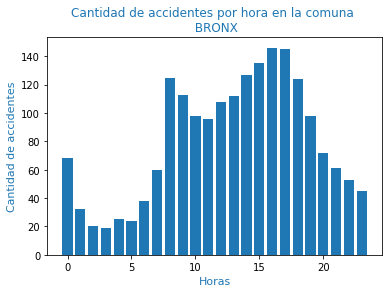

In [24]:
#sns.barplot(x = horas_comuna.index, y = horas_comuna.values, data = horas_comuna,ci=False)

bronx=plt.bar(horas_comuna.index, horas_comuna.values) #BRONX
plt.ylabel("Cantidad de accidentes",fontdict = {'fontsize':11,'color':'tab:blue'})
plt.xlabel("Horas",fontdict = {'fontsize':11,'color':'tab:blue'})
plt.title('Cantidad de accidentes por hora en la comuna \n BRONX', loc = "center", fontdict = {'fontsize':12, 'color':'tab:blue'})


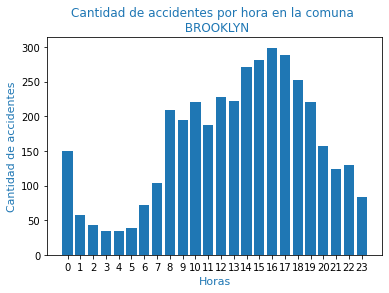

In [25]:
df
df8=df.loc[(df['BOROUGH'] == 'BROOKLYN')]
horas_comuna = df8.groupby(df8['HORAS']).HORAS.count()
brooklyn = plt.bar(horas_comuna.index, horas_comuna.values)
plt.ylabel("Cantidad de accidentes",fontdict = {'fontsize':11,'color':'tab:blue'})
plt.xlabel("Horas",fontdict = {'fontsize':11,'color':'tab:blue'})
plt.title('Cantidad de accidentes por hora en la comuna \n BROOKLYN', loc = "center", fontdict = {'fontsize':12, 'color':'tab:blue'})
plt.xticks(list(range(0,24)),[str(i) for i in range(0,24)])
plt.show()

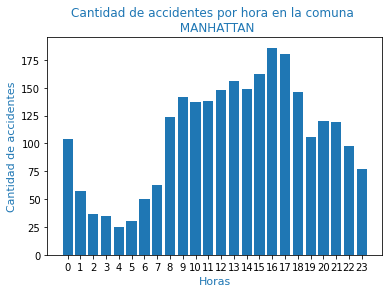

In [26]:
# Escriba su códidf
df8=df.loc[(df['BOROUGH'] == 'MANHATTAN')]
horas_comuna = df8.groupby(df8['HORAS']).HORAS.count()
manhattan = plt.bar(horas_comuna.index, horas_comuna.values)
plt.ylabel("Cantidad de accidentes",fontdict = {'fontsize':11,'color':'tab:blue'})
plt.xlabel("Horas",fontdict = {'fontsize':11,'color':'tab:blue'})
plt.title('Cantidad de accidentes por hora en la comuna \n MANHATTAN', loc = "center", fontdict = {'fontsize':12, 'color':'tab:blue'})
plt.xticks(list(range(0,24)),[str(i) for i in range(0,24)])
plt.show()


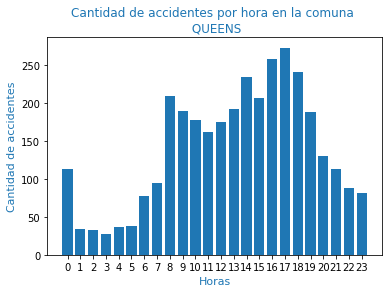

In [27]:
# Escriba su códidf
df8=df.loc[(df['BOROUGH'] == 'QUEENS')]
horas_comuna = df8.groupby(df8['HORAS']).HORAS.count()
manhattan = plt.bar(horas_comuna.index, horas_comuna.values)
plt.ylabel("Cantidad de accidentes",fontdict = {'fontsize':11,'color':'tab:blue'})
plt.xlabel("Horas",fontdict = {'fontsize':11,'color':'tab:blue'})
plt.title('Cantidad de accidentes por hora en la comuna \n QUEENS', loc = "center", fontdict = {'fontsize':12, 'color':'tab:blue'})
plt.xticks(list(range(0,24)),[str(i) for i in range(0,24)])
plt.show()


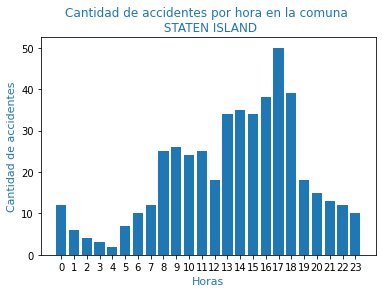

In [28]:
# Escriba su códidf
df8=df.loc[(df['BOROUGH'] == 'STATEN ISLAND')]
horas_comuna = df8.groupby(df8['HORAS']).HORAS.count()
manhattan = plt.bar(horas_comuna.index, horas_comuna.values)
plt.ylabel("Cantidad de accidentes",fontdict = {'fontsize':11,'color':'tab:blue'})
plt.xlabel("Horas",fontdict = {'fontsize':11,'color':'tab:blue'})
plt.title('Cantidad de accidentes por hora en la comuna \n STATEN ISLAND', loc = "center", fontdict = {'fontsize':12, 'color':'tab:blue'})
plt.xticks(list(range(0,24)),[str(i) for i in range(0,24)])
plt.show()


## Parte 6: Causa de accidentes

¿Qué factores provocan la mayoría de los accidentes?

In [29]:

df_to_clean = df.loc[:, ['CONTRIBUTING FACTOR VEHICLE 1','CONTRIBUTING FACTOR VEHICLE 2','CONTRIBUTING FACTOR VEHICLE 3','CONTRIBUTING FACTOR VEHICLE 4','CONTRIBUTING FACTOR VEHICLE 5']]


df_to_clean
vehiculo_1=df_to_clean["CONTRIBUTING FACTOR VEHICLE 1"].value_counts()
vehiculo_2=df_to_clean["CONTRIBUTING FACTOR VEHICLE 2"].value_counts()
vehiculo_3=df_to_clean["CONTRIBUTING FACTOR VEHICLE 3"].value_counts()
vehiculo_4=df_to_clean["CONTRIBUTING FACTOR VEHICLE 4"].value_counts()
vehiculo_5=df_to_clean["CONTRIBUTING FACTOR VEHICLE 5"].value_counts()

vehiculo_1

Driver Inattention/Distraction                           3077
Unspecified                                              3057
Failure to Yield Right-of-Way                             941
Following Too Closely                                     775
Backing Unsafely                                          699
Passing Too Closely                                       565
Passing or Lane Usage Improper                            533
Other Vehicular                                           424
Turning Improperly                                        325
Unsafe Lane Changing                                      294
Traffic Control Disregarded                               210
Driver Inexperience                                       184
Unsafe Speed                                              154
Reaction to Uninvolved Vehicle                            141
Alcohol Involvement                                       119
View Obstructed/Limited                                   112
Pavement

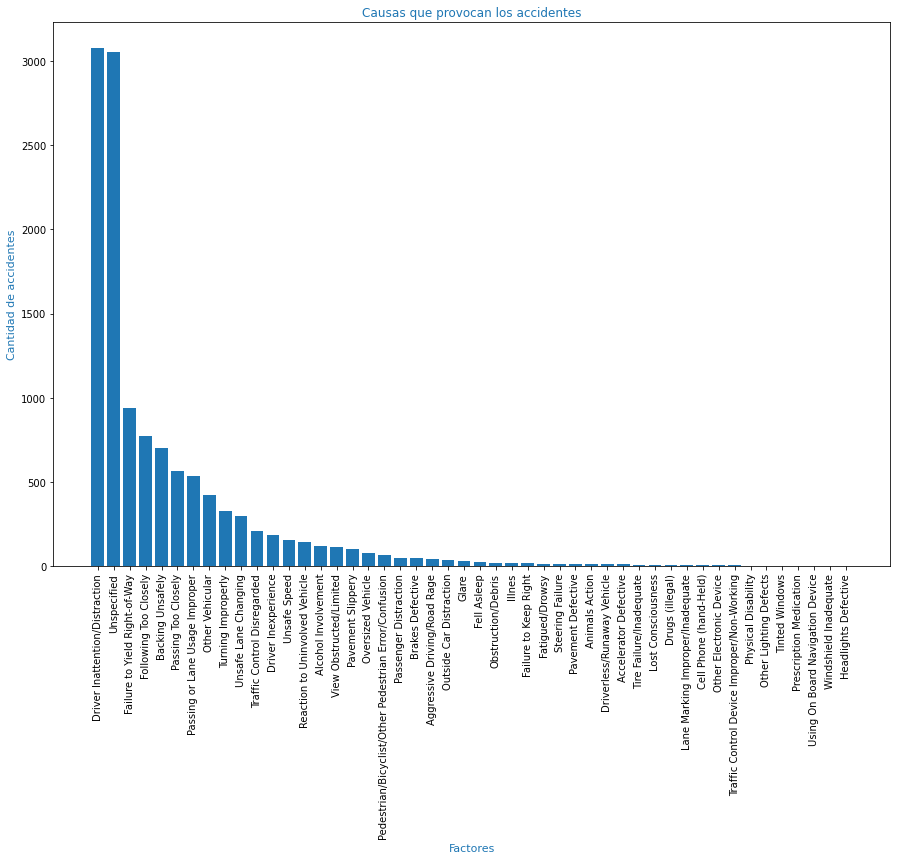

In [30]:
fig, ax = plt.subplots(figsize = (15, 10))
plt.bar(vehiculo_1.index,vehiculo_1.values)
plt.ylabel("Cantidad de accidentes",fontdict = {'fontsize':11,'color':'tab:blue'})
plt.xlabel("Factores",fontdict = {'fontsize':11,'color':'tab:blue'})
plt.title('Causas que provocan los accidentes', loc = "center", fontdict = {'fontsize':12, 'color':'tab:blue'})
plt.xticks(rotation=90)
plt.show()